**Table of Contents**
<div id="toc"></div>

In [13]:
%config IPCompleter.greedy=True

# Importing and Displaying CDC Vaccine Data

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [15]:
df = pd.read_json('https://data.cdc.gov/resource/pvgy-252u.json', orient='columns')
# df = pd.read_json('https://datahub.smcgov.org/resource/dmz9-a27g.json', orient='columns')

In [16]:
xList, yList, lon, lat = [], [], [], []

# https://gis.stackexchange.com/questions/156035/calculating-mercator-coordinates-from-lat-lon/156046
def merc(lat, lon):
    r_major = 6378137.000
    x = r_major * math.radians(lon)
    scale = x/lon
    y = 180.0/math.pi * math.log(math.tan(math.pi/4.0 + lat * (math.pi/180.0)/2.0)) * scale
    return (x, y)

for i in range(len(df.location_1)):
    if str(df.location_1[i]) != 'nan':
        cord = merc(df.location_1[i]['coordinates'][1], df.location_1[i]['coordinates'][0])
        xList.append(cord[0])
        yList.append(cord[1])
        lat.append(df.location_1[i]['coordinates'][1])
        lon.append(df.location_1[i]['coordinates'][0])

# Graphing CDC Vaccine Data

In [18]:
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
from bokeh.models import HoverTool
from bokeh.tile_providers import CARTODBPOSITRON
from bokeh.io import show,output_file

source=ColumnDataSource({'x':xList,'y':yList})

x_range=(min(xList),max(xList))
y_range=(min(yList),max(yList))

plot = figure(title='Disease Map', tools='pan,wheel_zoom', 
              x_range=x_range, y_range=y_range, 
              x_axis_type="mercator", y_axis_type="mercator", 
              width=600, height=600)
plot.add_tile(CARTODBPOSITRON)

plot.circle(x="x", y="y", size=15, fill_color="red", fill_alpha=0.8, source=source)
plot.add_tools(HoverTool(tooltips=[
    ("(Long, Lat)", "(%s, %s)" % (lon, lat)),
]))

output_file("disease-map.html")
show(plot)

# Testing Graphing with Example Data

In [6]:
scottish_hills = {'Hill Name': ['Ben Nevis', 'Ben Macdui', 'Braeriach', 'Cairn Toul', 'Sgòr an Lochain Uaine'],
                  'Height': [1345, 1309, 1296, 1291, 1258],
                  'Latitude': [56.79685, 57.070453, 57.078628, 57.054611, 57.057999],
                  'Longitude': [-5.003508, -3.668262, -3.728024, -3.71042, -3.725416]}

dataframe = pd.DataFrame(scottish_hills)
print(dataframe)

dataframe = pd.DataFrame(scottish_hills, columns=['Hill Name', 'Height', 'Latitude', 'Longitude'])

               Hill Name  Height   Latitude  Longitude
0              Ben Nevis    1345  56.796850  -5.003508
1             Ben Macdui    1309  57.070453  -3.668262
2              Braeriach    1296  57.078628  -3.728024
3             Cairn Toul    1291  57.054611  -3.710420
4  Sgòr an Lochain Uaine    1258  57.057999  -3.725416


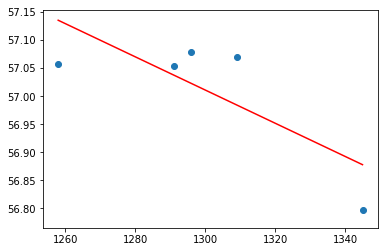

In [7]:
from scipy.stats import linregress

x = dataframe.Height
y = dataframe.Latitude

stats = linregress(x, y)

m = stats.slope
b = stats.intercept

plt.scatter(x, y)
plt.plot(x, m * x + b, color="red")
plt.show()

In [8]:
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
from bokeh.tile_providers import CARTODBPOSITRON
from bokeh.io import save,output_file

#the data
xList=[0.0, 111319, 222638, 333958, 445277, 556597, 667916, 779236, 890555]
yList=[6446275, 5012341, 3763310, 2632018, 4163881, 5465442, 6800125, 6621293, 6446275]
source=ColumnDataSource({'x':xList,'y':yList})

x_range=(min(xList),max(xList))
y_range=(min(yList),max(yList))
plot = figure(title='printed line on map',tools= "pan,wheel_zoom",x_range=x_range,y_range=y_range,width=1200, height=400)#create a figure
plot.add_tile(CARTODBPOSITRON)#add the CARTODBPOSITRON background tile

#plot a dot an a line
plot.line(source=source,x='x',y='y',line_color ='red')#line

#save to html file
output_file("file.html")
show(plot)